# Exploratory data analysis of Titanic data

Titanic data is very interesting data to explore specially for biginners in machine learning and data science .I hope this notebook is useful for you to understand and explore the data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the dataset
train=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')

In [3]:
#take a look at the data
print('train shape is:',train.shape,'\n','test shape is:',test.shape,'\n\n')
print('the features of data:\n\n',train.columns.values)
train.head()


train shape is: (891, 12) 
 test shape is: (418, 11) 


the features of data:

 ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#desciptive statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#for catigorical data
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Elsbury, Mr. William James",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


## Explore data

lets explore the data and try to answer som questions

#### Q1: Is there a relationship between age and sex to be survived and could the age and sex affect the probability of survival?
so lets try to answer this question

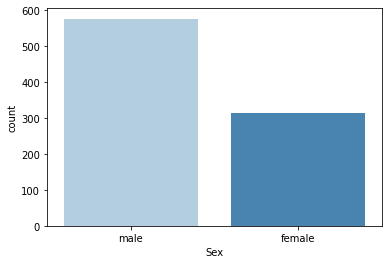

In [6]:
#count plot for sex column
sns.countplot(x='Sex',data=train,palette='Blues');

from this graph we notice the count of males and females among the passengers and as we can see the number of males are more than females

Text(0.5, 0, 'Age')

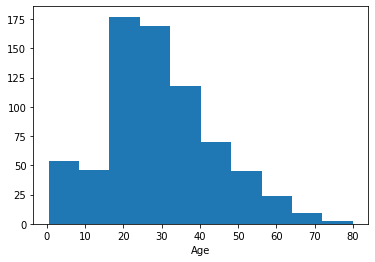

In [7]:
#plot histogram for Age column
plt.hist(train['Age']);
plt.xlabel('Age')

from this histogram we notice that there is a variance in age of passengers from children to old but the most passengers are adult between teenagers until 30 years old.

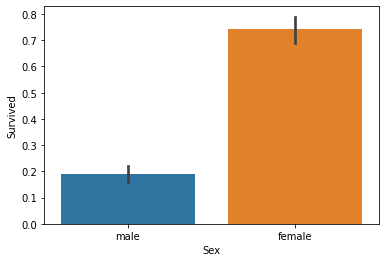

In [8]:
#plot the relationship between Sex and surviving
sns.barplot(x='Sex',y='Survived',data=train);

from the graph we understand that females are survived more than males in Titanic

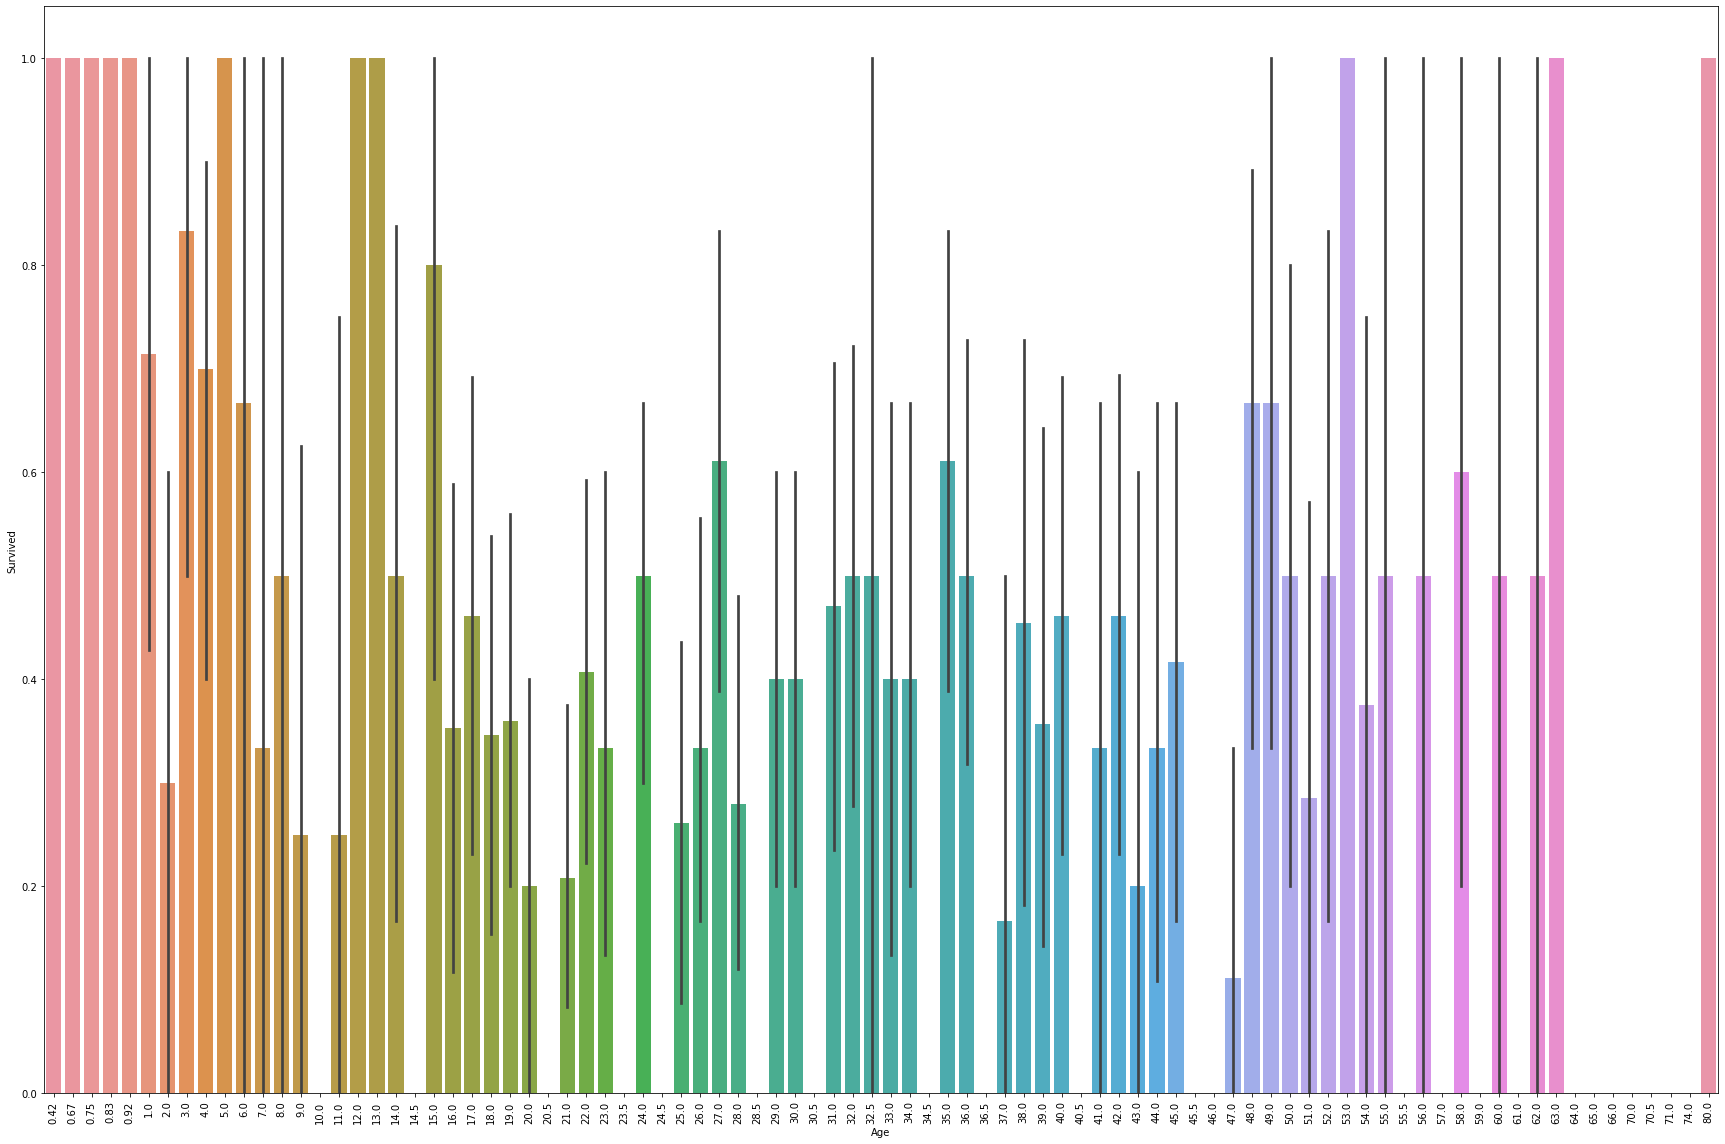

In [9]:
#plot the relationship between Sex and AGE
fig=plt.figure(figsize=(30,20))
sns.barplot(x='Age',y='Survived',data=train);
plt.xticks(rotation=90);

from the graph we notice that we have three catigories of passengers  and survival rate is increase in children and elder passengers than the adults

#### The answer of question 1 is:

- the number of males are more than number of females among the passengers
- the age of passengers is varying between infant until old ,but the most passengers are adults.
- females have survival rate more than males so there is a strong relationship between sex    and surviving.
- the passengers devided into 3 catigoris depending on age (children,adults,olds)and the      survival rate is more high between children and elder passengers than adults,sothere is a     strong relationship between Age and surviving.

#### Q2: Does the passenger's social level affect his survival or not?

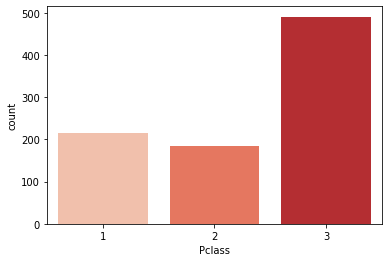

In [10]:
#count plot for Class column
sns.countplot(x='Pclass',data=train,palette='Reds');

from the graph we could notice that the half of passengers were in the third class

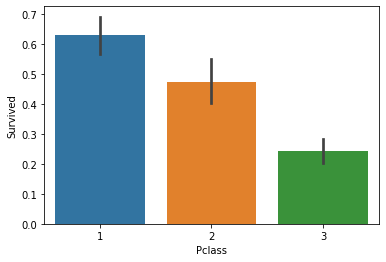

In [11]:
#plot the relationship between Pclass and survived columns
sns.barplot(x='Pclass',y='Survived',data=train);

the graph shows the highest survival rate is among first class passengers and the lowest is among the third class

##### lets see the sex of passengers in each class with their survival rate

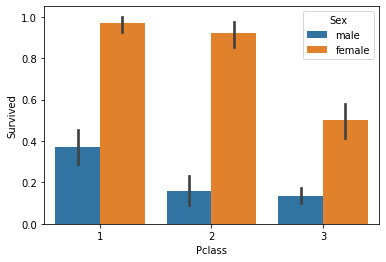

In [12]:
#plot the relationship between Pclass,Sex and survived columns
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train);

as we notice from the graph females have large survival rate in class one then class two and the lowest one in class three.
we notice the same in males.

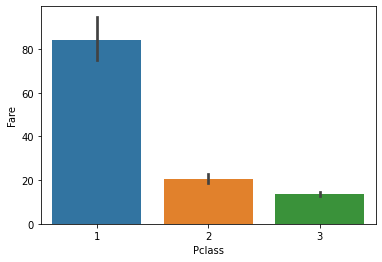

In [13]:
#plot the relationship between Pclass and Fare
sns.barplot(x='Pclass',y='Fare',data=train);

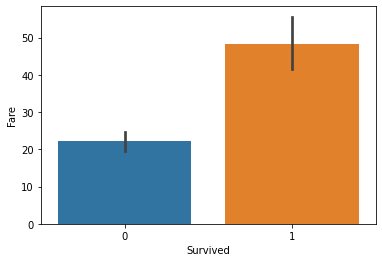

In [14]:
#plot the relationship between the surviving and Fare
sns.barplot(x='Survived',y='Fare',data=train);

#### the answer of question 2:
- yes the passenger's social level affect his surviving.
- the highest survival rate found in calass 1 then 2 and the lowest is in class 3.
- the ticket fare also has a strong relationship with surviving ,as the fare increase the surviving rate increase too.

### more explore and analysis for Age and Name

#### missing data

In [15]:
#missing data for Age column
train['Age'].isnull().sum()

177

to impute the missing data in Age columns we find it's relationshp with Name column

In [16]:
train['Name'].unique()[:5]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry'], dtype=object)

In [17]:
#Extract titles from Name (training data)
train['Title']=0
train['Title']=train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


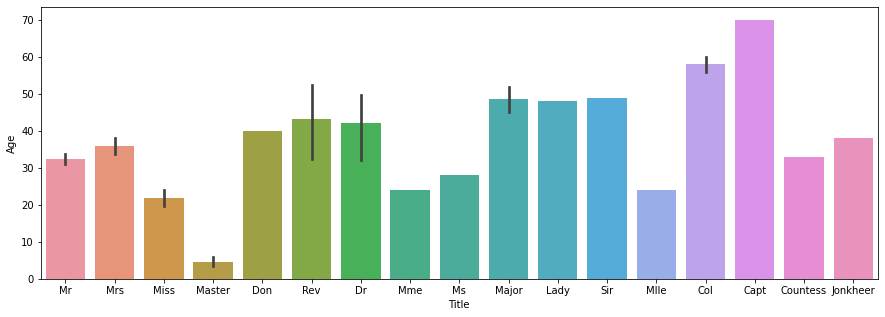

In [18]:
#barplot between Age and Title features
plt.figure(figsize=(15,5))
sns.barplot(x='Title',y='Age',data=train);

from the graph we can see there is a very good relationship between Age and Title so we can use this relation to handle with missing data in Age column.

In [19]:
#replace Ms title with Miss to avoid some problems with missing data handling
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Major',
       'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer'],
      dtype=object)

In [20]:
#find the mean of ages 
MEAN=train.groupby('Title')['Age'].mean()
MEAN.head()

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          42.0
Name: Age, dtype: float64

In [21]:
#Transform MEAN to dictionary
dict_MEAN=MEAN.to_dict()
dict_MEAN

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.816326530612244,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.898148148148145,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [22]:
#impute ages based on titles
indx_null_age=train.loc[train['Age'].isnull()].index
train.loc[indx_null_age,'Age']=train.loc[indx_null_age,'Title'].map(dict_MEAN)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [23]:
#chack missing data again
train['Age'].isnull().sum()

0

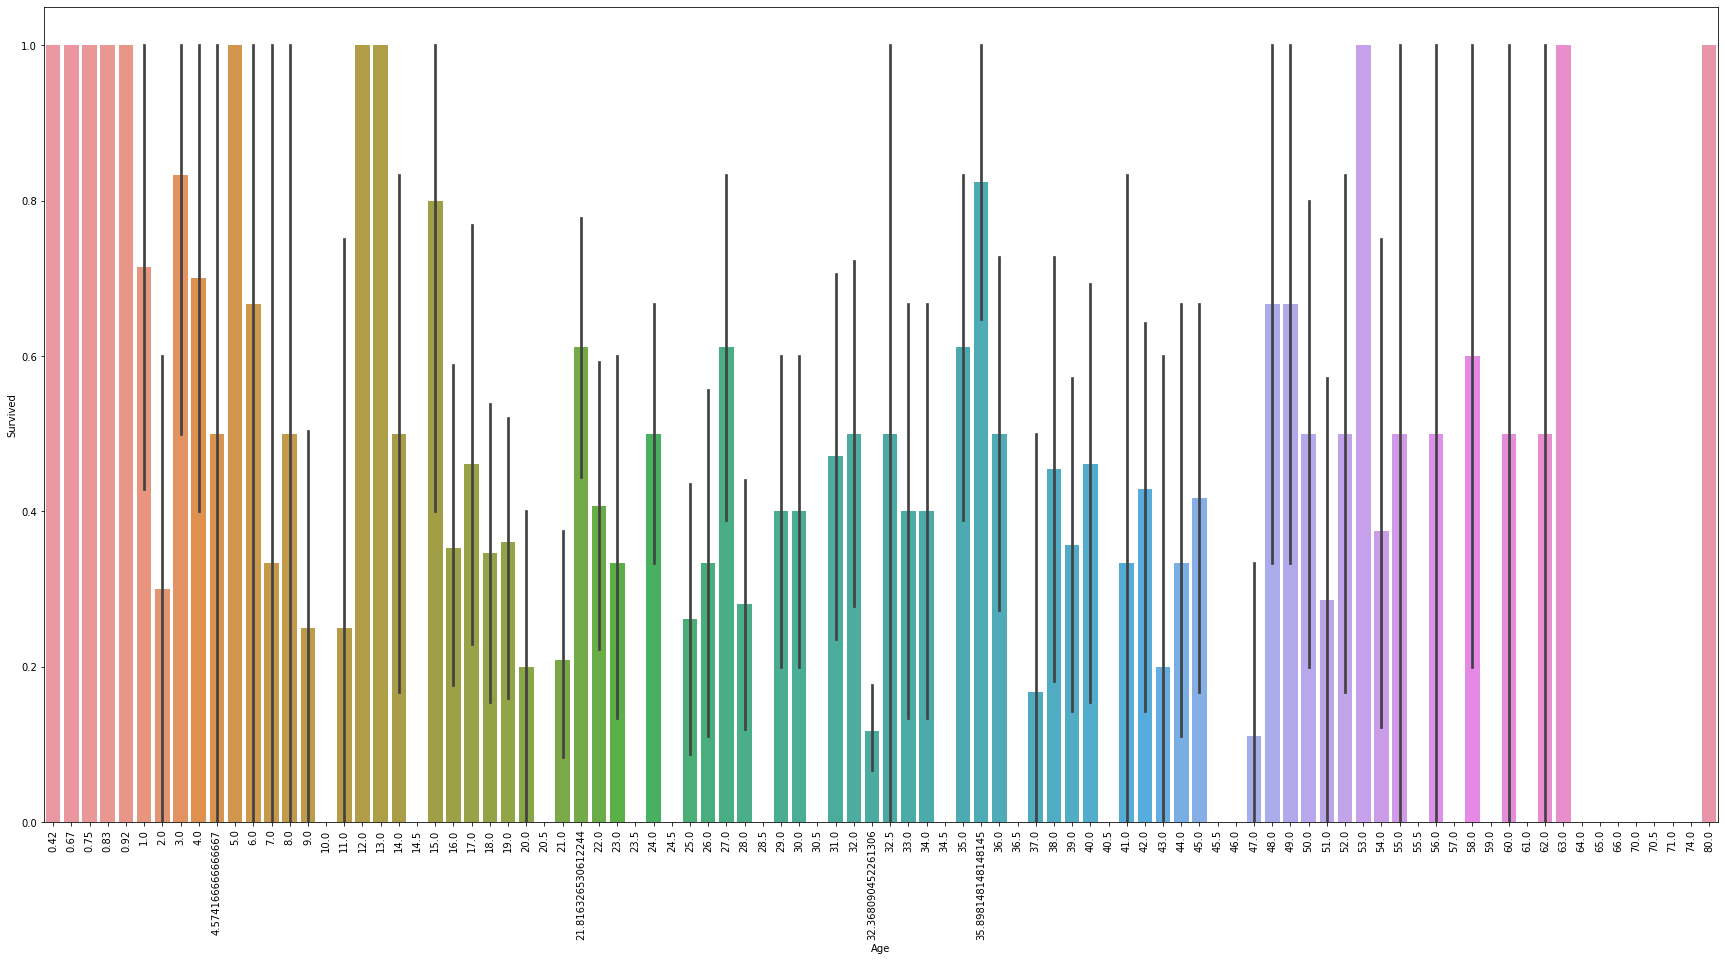

In [24]:
#plot Age and Survived fearures again to detect and select ageband from the graph
plt.figure(figsize=(30,15))
sns.barplot(x='Age',y='Survived',data=train)
plt.xticks(rotation=90);

according to the graph I will divide the Age to three bands in the range(0,15,48,80)

In [25]:
#create Ageband
train['Age']=pd.cut(train['Age'],bins=[0,15,48,80],labels=['child','adult','elder'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,adult,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,adult,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,adult,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,adult,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,adult,0,0,373450,8.0500,NaN,S,Mr


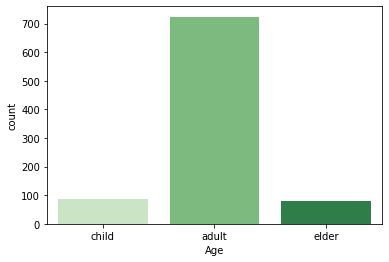

In [26]:
#count plot for Age column after this modification
sns.countplot(x='Age',data=train,palette='Greens');

from the graph as we can see the most passengers were adults

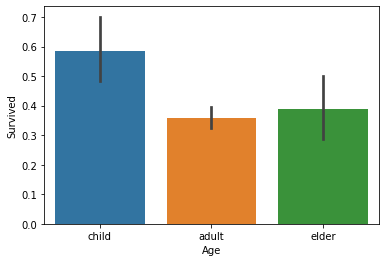

In [27]:
#plot the relationsip between Age and survived
sns.barplot(x='Age',y='Survived',data=train);


#### Q3: Does family size has an effect on survival rate?

to answer this question we have to create new features

In [28]:
#create new feature from SibSp and Parch features
train['Family size']=train['SibSp']+train['Parch']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family size
0,1,0,3,"Braund, Mr. Owen Harris",male,adult,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,adult,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,adult,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,adult,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,adult,0,0,373450,8.0500,NaN,S,Mr,0


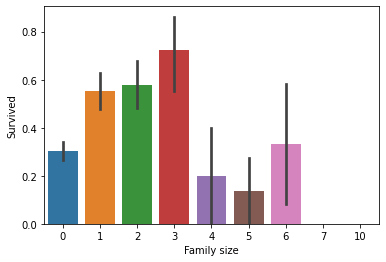

In [29]:
#plot the relationsip between Family size and survived
sns.barplot(x='Family size',y='Survived',data=train);


In [30]:
#create Isalone feature
train['Isalone']=0
train.loc[train['Family size']==1,'Isalone']=1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family size,Isalone
0,1,0,3,"Braund, Mr. Owen Harris",male,adult,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,adult,1,0,PC 17599,71.2833,C85,C,Mrs,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,adult,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,adult,1,0,113803,53.1000,C123,S,Mrs,1,1
4,5,0,3,"Allen, Mr. William Henry",male,adult,0,0,373450,8.0500,NaN,S,Mr,0,0


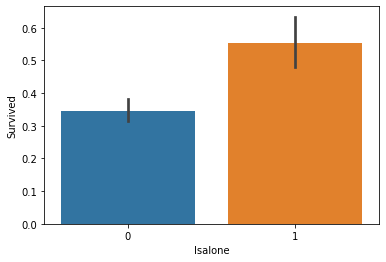

In [31]:
#plot the relationsip between Isalone and survived
sns.barplot(x='Isalone',y='Survived',data=train);


from these above graphs we notice that there is a strong relationship between Isalone and Surviving than with Family size so the passenger who is alone has more survival rate than the passenger with his family 

#### lets explore Embarked column

##### missing data

In [32]:
#missing data for Embarked column
train['Embarked'].isnull().sum()

2

In [33]:
#handel with missing data in Embarked feature 
#train['Embarked'].head()
train['Embarked'].mode()[0]

'S'

In [34]:
#fill nulls with most common value S
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

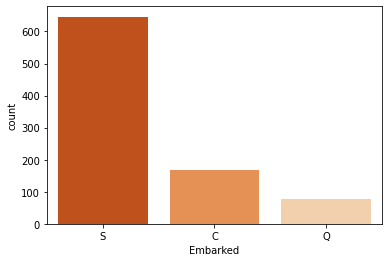

In [35]:
#count plot for Embarked column
sns.countplot(x='Embarked',data=train,palette='Oranges_r');

this graph shows the Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). as we notice the most passengers embarkation is Southampton

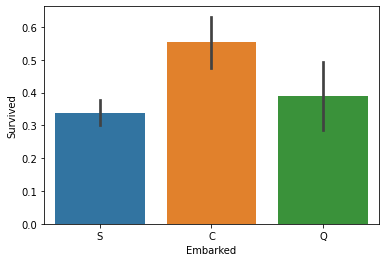

In [36]:
#plot the relationsip between Embarked and survived
sns.barplot(x='Embarked',y='Survived',data=train);


the most survived passengers are from embarked C

lets see in a graph the surviving rate between children,adults and old passengers in each embarked and each class

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


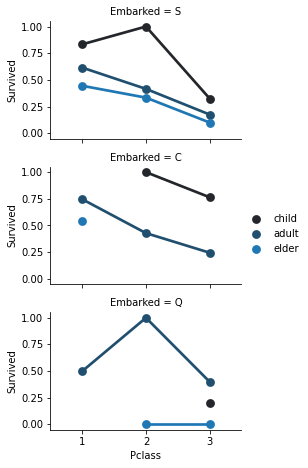

In [37]:
grid = sns.FacetGrid(train,row='Embarked', size=2.2, aspect=1.6);
grid.map(sns.pointplot,'Pclass', 'Survived','Age',alpha=.5, ci=None);
grid.add_legend();

### The end

this is all I did in exploring Titanic data I hope it gaves you a little bit about exploring and yes I focused more on the geaphs because I think it is a very strong tool to show the relationships.